# Haffman

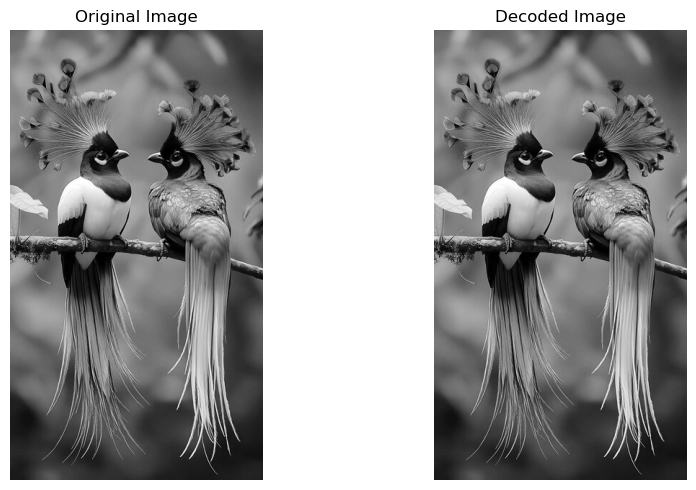

The original and decoded images are identical!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from collections import Counter
import heapq

# Step 1: Load the image and convert it to grayscale
image_path = r"C:\Users\roari\Downloads\Bird 9.jpg"
image = io.imread(image_path, as_gray=True)
image = img_as_ubyte(image)  # Convert image to 8-bit unsigned integers

# Flatten the image (convert it to a 1D array of pixel values)
pixels = image.flatten()

# Step 2: Calculate the frequency of each pixel value
frequencies = Counter(pixels)

# Step 3: Build the Huffman Tree
class HuffmanNode:
    def __init__(self, frequency, symbol=None, left=None, right=None):
        self.symbol = symbol
        self.frequency = frequency
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(frequencies):
    heap = [HuffmanNode(freq, sym) for sym, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(left.frequency + right.frequency, left=left, right=right)
        heapq.heappush(heap, merged)

    return heap[0]

# Step 4: Generate Huffman codes
def generate_huffman_codes(node, code='', huffman_code={}):
    if node is None:
        return
    if node.symbol is not None:  # It's a leaf node
        huffman_code[node.symbol] = code
    generate_huffman_codes(node.left, code + '0', huffman_code)
    generate_huffman_codes(node.right, code + '1', huffman_code)
    return huffman_code

# Build Huffman tree and generate codes
huffman_tree = build_huffman_tree(frequencies)
huffman_codes = generate_huffman_codes(huffman_tree)

# Step 5: Encode the image using Huffman codes
encoded_image = ''.join([huffman_codes[pixel] for pixel in pixels])

# Step 6: Decode the binary string back to the original image
def decode_huffman(encoded_data, huffman_tree, total_pixels):
    decoded_pixels = []
    node = huffman_tree
    for bit in encoded_data:
        node = node.left if bit == '0' else node.right
        if node.symbol is not None:
            decoded_pixels.append(node.symbol)
            node = huffman_tree
        if len(decoded_pixels) == total_pixels:
            break
    return np.array(decoded_pixels)

# Decode the image
decoded_pixels = decode_huffman(encoded_image, huffman_tree, len(pixels))
decoded_image = np.reshape(decoded_pixels, image.shape)

# Step 7: Display original and decoded images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Decoded Image')
plt.imshow(decoded_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Check if the images are identical
if np.array_equal(image, decoded_image):
    print("The original and decoded images are identical!")
else:
    print("The images are not identical.")
